In [1]:
# Import packages
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
#import libpysal as ps
from statsmodels.tsa.seasonal import STL
import plotly.express as px

In [2]:
all_visits = pd.read_csv("toR.csv",parse_dates=['datetime'])

In [3]:
strat_stats = pd.read_csv("raw_data/strat_stats.csv")

In [4]:
#all_visits is the dataset I already gave you
#df0=pd.DataFrame({"poi":all_visits["POI_index"],"day":all_visits["datetime"].dt.dayofyear+365*(all_visits["datetime"].dt.year==2021),"datetime":all_visits["datetime"],"type":all_visits["type"],"uid":all_visits["uid"]})
df0=all_visits.copy()

In [5]:
df0

,poi,day,datetime,type,uid
0,4201,1,2020-01-01 00:00:00-05:00,bars,077480D3-7C5E-46AE-8CAF-E949E78C5A35
1,2185,1,2020-01-01 00:00:00-05:00,dentists,077480D3-7C5E-46AE-8CAF-E949E78C5A35
2,1754,1,2020-01-01 00:00:00-05:00,conveniences,077480d3-7c5e-46ae-8caf-e949e78c5a35
3,2537,1,2020-01-01 00:00:00-05:00,hgs,077480d3-7c5e-46ae-8caf-e949e78c5a35
4,7772,1,2020-01-01 00:00:00-05:00,restaurants,3f5e8df1-da24-4259-a16c-d34cc31f9bb2
...,...,...,...,...,...
864456,471,546,2021-06-30 18:36:00-05:00,cloths,14fb39bc-e5a8-4638-97a9-7602d8a64229
864457,1505,546,2021-06-30 18:36:00-05:00,restaurants,1f064ba0-201f-4c25-8105-aa2738c8f11b
864458,4238,546,2021-06-30 18:48:00-05:00,cafes,0cd97ae5-df49-455f-9bda-9c7b5f36659e
864459,471,546,2021-06-30 18:48:00-05:00,cloths,14fb39bc-e5a8-4638-97a9-7602d8a64229


In [5]:
df=df0.drop_duplicates(subset=["day","poi","uid"])
df=df.groupby(['day', 'type']).count()["uid"].reset_index()
df=df.sort_values(by="day")
df

,day,type,uid
0,1,banks,38
16,1,supers,39
15,1,restaurants,165
14,1,posts,8
13,1,physios,1
...,...,...,...
6023,366,bars,44
6022,366,banks,39
6036,366,restaurants,144
6028,366,conveniences,57


In [6]:
df1=df.copy()
df1=df1.merge(strat_stats,on='day')

df1['r']=df1['uid']/df1['count']*1000000

In [9]:
#only count unique person x visits, examine restaurant visits only (you could choose another POI type) and take aggegrate counts by day
df3=df0.copy()
df1=df1.loc[(df1["type"]=="electrics")
            &(df1['region']==3)]

df1=df1.drop_duplicates(subset=["day","poi","uid"])
df1=df1.groupby(["day"]).count()["uid"].reset_index()
df1=df1.sort_values(by="day")
df1.loc[df1['day']==171]


In [11]:
#STL
restaurants = predict(df0, tp="electrics", date='2020-06-19', day_num=171)
restaurants

1.1752568160926362

# line plot compare with control group

In [ ]:
df2=df1.groupby(['day']).sum()['r'].reset_index()
fig=px.line(df2, x='day', y='r',  title="visit counts") # plot the minimum wage over time
fig.add_vline(x=79, line_dash="dash")
fig.add_vline(x=132, line_dash="dash")
fig.add_vline(x=227, line_dash="dash")
fig.add_vline(x=266, line_dash="dash")
fig.show()

In [43]:
did=df1[df1['type'].isin([ 'dentists','electrics'])] # subset the data to only include experimental and control groups
px.line(did, x='day', y='uid', color='type', title="visit to pharms and electrics") # plot the visit over time

In [44]:
did['post']=np.where(did['day']=='171',1,0) # create a variable that is 1 if the date is tax free day and 0 otherwise
did['treatment']=np.where(did['type']=='electrics',1,0) # create a variable that is 1 if the type is electrics (i.e., the treatment group) and 0 for pharmacy (the control group)
did['post_treatment']=did['post']*did['treatment'] # create a variable that is 1 if the date is on the tax free day and the type is electrics and 0 otherwise

C:\Users\Gabriella_Young\AppData\Local\Temp\ipykernel_15040\2652003582.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gabriella_Young\AppData\Local\Temp\ipykernel_15040\2652003582.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gabriella_Young\AppData\Local\Temp\ipykernel_15040\2652003582.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

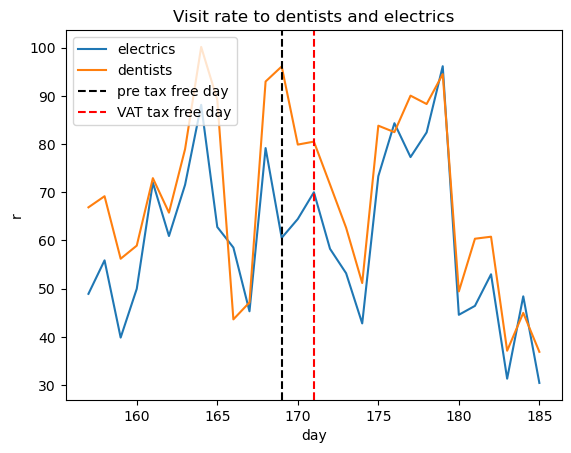

In [46]:
did=did[(did['day']>=157) & (did['day']<=185)] #day=171

#did=did[(did['day']>=312) & (did['day']<=340)] #day=326

sns.lineplot(data=did,x='day',y='r',hue='type')
plt.axvline(x=169,color='black',linestyle='dashed', label='pre tax free day')
plt.axvline(x=171,color='red',linestyle='dashed', label='VAT tax free day')
plt.title('Visit rate to dentists and electrics')
plt.legend(loc='upper left')